# Developing Model Agnostic Tools 

This notebook runs through the development of two agnostic tools of interest for model selection based on a desired data metric.<br><br>
**1. Lookup Warming Level and Year Tool**: This tool illustrates the on-going development of functionality to identify either a **warming level** or a **year** of interest, based on a given scenario. This tool ties warming levels, climate scenarios, and year together for a specific location that may be of interest to stakeholders for their planning needs.<br><br>*Intended Application*: As a utility analyst, I want to be able to enter either a warming level or year of interest, and extract information on the model distribution at that warming level or year for my analysis needs. <br><br>
**2. LOCA Simulation Explorer Tool**: This tool illustrates the on-going development of functionality to identify the LOCA simulations that match a pre-selected list of statistics for a metric, namely the min, max, quartiles, and middle 10% of models. <br><br>*Intended Application*: As a policy-maker exploring future projects, I want to understand the landscape of LOCA runs in order to utilize a range of projections in my decision-making. 

## Step 0: Setup 

In [5]:
from climakitae.explore.agnostic import (
    create_lookup_tables,
    create_conversion_function,
    get_cached_area_loca, 
    get_lat_lon_loca, 
    plot_sims, 
    create_interactive_panel
)

## Tool 1: Lookup Warming Level and Year

This tool is designed to provide critical information on the connections between global warming levels, scenario, and timing amongst model simulations. We utilize SSP3-7.0 here as the climate scenario. The handy `find_warm_level_or_time` function will return either the `warming_level` or `year` of interest based on the inputs and is completely flexible for input needs. Warming levels are constrained to 1.5°C, 2.0°C, and 3°C, as only a portion of model simulations do not reach 4°C warming to provide statistical confidence in the results. 

### Step 1: Create the model lookup tables
The `find_warm_level_or_time` function is built off of look-up tables for all simulations and their designated warming levels based on the 1850-1900 historical baseline as is standard in the global warming levels approach. First we need to generate the lookup tables that this function utilizes. 

In [2]:
lookup_tables = create_lookup_tables()
find_warm_level_or_time = create_conversion_function(lookup_tables)

FileNotFoundError: [Errno 2] No such file or directory: '/home/jovyan/src/climakitae/climakitae/data/gwl_1850-1900ref_agnostic_tools_numnum.csv'

In [ ]:
lookup_tables['time lookup table']

### Step 2: Example usage of the Lookup Function for Identifying a Year

In the following cells, we demonstrate how to find the year and month of interest when a **warming level** is passed as input to the tool, and returns several key pieces of information based on SSP3-7.0 as the climate scenario:
- A histogram of all 80 simulations binned by when the simulation reaches the input warming level
- Median year, and the specific year-month

In [ ]:
find_warm_level_or_time(warming_level='1.5')

In [ ]:
find_warm_level_or_time(warming_level='2.0')

In [ ]:
find_warm_level_or_time(warming_level='3.0')

### Step 3: Example usage of the Lookup Tool to find the projected warming level

In the following cells, we demonstrate how to find the warming level interest when a **year** is passed as input to the tool, and returns several key pieces of information based on SSP3-7.0 as the climate scenario:
- A histogram of all 80 simulations binned by warming level
- The major warming level nearest to the median projected warming level
- Information on the median projected warming level

In [ ]:
find_warm_level_or_time(year=2025)

In [ ]:
find_warm_level_or_time(year=2050)

In [ ]:
find_warm_level_or_time(year=2070)

In [ ]:
find_warm_level_or_time(year=2100)

## Tool 2: LOCA Simulation Explorer Tool

Now we demonstrate the on-going development of the LOCA Simulation Explorer tool. Given a specific location and pre-calculated metric of interest, this tool returns information on the statistical distribution of simulations based on the selected metric for suitability in planning design. 

Current metrics include: Average Maximum Air Temperature (2030-2059), Average Minimum Air Temperature (2030-2059), Average Maximum Relative Humidity (2030-2059), and Average Annual Total Precipitation (2030-2059). More metrics, and customization of metrics, is forthcoming. 

### Step 1: Spin up a cluster to utilize compute resources
Because there are a large number of LOCA simulations to analyze, spinning up a cluster will help speed up calculations. This may take a minute or two to setup. 

In [ ]:
from climakitae.util.cluster import Cluster
cluster = Cluster()
cluster.adapt(minimum=0, maximum=43)
client = cluster.get_client()
client

### Step 2: Select metric to explore

At present, there are 4 available metrics to explore the distribution amongst LOCA simulations. We'll utilize `Average Max Air Temperature` in our examples below.

In [6]:
panel, dropdown_val = create_interactive_panel()
panel

Column
    [0] Select(name='Pre-calculated metrics', options=['Average Max Air Temperat...], value='Average Max A..., width=350)

### Step 3: Identify location of interest

Next, we identify a single gridcell location to visualize the results. This will take a minute or two to calculate all the input statistics. Hang tight!

In [7]:
%%time
single_stats_gridcell, multiple_stats_gridcell, sorted_sims_gridcell = get_lat_lon_loca(37.8012, -122.2583, dropdown_val.value)

CPU times: user 28.6 s, sys: 10.5 s, total: 39.1 s
Wall time: 31.7 s


With the below function, we can look at the distribution of LOCA simulations across a selected dropdown value for the SCE service territory.

In [9]:
%%time
single_stats_area, sorted_sims_area = get_cached_area_loca("CA Electric Load Serving Entities (IOU & POU)", 'Southern California Edison', dropdown_val.value)

/srv/conda/envs/notebook/lib/python3.9/site-packages/xarray/core/indexing.py:1374: PerformanceWarning: Slicing with an out-of-order index is generating 29 times more chunks
  return self.array[key]


CPU times: user 2min 11s, sys: 56.7 s, total: 3min 8s
Wall time: 5min 20s


### Step 4: Visualize distribution amongst simulations
Below we illustrate how to retrieve information on the min, max, 25th and 75th quartiles, and the middle 10% of the distribution.

In [4]:
single_stats_area['min']

NameError: name 'single_stats_area' is not defined

In [5]:
min_sim = single_stats_gridcell['min']
min_sim

<xarray.DataArray 'Maximum air temperature at 2m' (time: 360)>
dask.array<getitem, shape=(360,), dtype=float32, chunksize=(187,), chunktype=numpy.ndarray>
Coordinates:
    lat         float32 37.8
    lon         float32 -122.3
  * time        (time) datetime64[ns] 2030-01-01 2030-02-01 ... 2059-12-01
    simulation  <U29 'LOCA2_ACCESS-CM2_r1i1p1f1'
    scenario    <U43 'Historical + SSP 3-7.0 -- Business as Usual'
Attributes:
    variable_id:           tasmax
    extended_description:  The maximum daily air temperature at 2m above the ...
    units:                 degF
    data_type:             Gridded
    resolution:            3 km
    frequency:             monthly
    location_subset:       ['coordinate selection']
    institution:           UCSD

In [6]:
q1_sim = single_stats_gridcell['q1']
q1_sim

<xarray.DataArray 'Maximum air temperature at 2m' (time: 360)>
dask.array<getitem, shape=(360,), dtype=float32, chunksize=(187,), chunktype=numpy.ndarray>
Coordinates:
    lat         float32 37.8
    lon         float32 -122.3
  * time        (time) datetime64[ns] 2030-01-01 2030-02-01 ... 2059-12-01
    simulation  <U29 'LOCA2_MRI-ESM2-0_r3i1p1f1'
    scenario    <U43 'Historical + SSP 3-7.0 -- Business as Usual'
Attributes:
    variable_id:           tasmax
    extended_description:  The maximum daily air temperature at 2m above the ...
    units:                 degF
    data_type:             Gridded
    resolution:            3 km
    frequency:             monthly
    location_subset:       ['coordinate selection']
    institution:           UCSD

In [7]:
med_sim = single_stats_gridcell['median']
med_sim

<xarray.DataArray 'Maximum air temperature at 2m' (time: 360)>
dask.array<getitem, shape=(360,), dtype=float32, chunksize=(187,), chunktype=numpy.ndarray>
Coordinates:
    lat         float32 37.8
    lon         float32 -122.3
  * time        (time) datetime64[ns] 2030-01-01 2030-02-01 ... 2059-12-01
    simulation  <U29 'LOCA2_CESM2-LENS_r1i1p1f1'
    scenario    <U43 'Historical + SSP 3-7.0 -- Business as Usual'
Attributes:
    variable_id:           tasmax
    extended_description:  The maximum daily air temperature at 2m above the ...
    units:                 degF
    data_type:             Gridded
    resolution:            3 km
    frequency:             monthly
    location_subset:       ['coordinate selection']
    institution:           UCSD

In [8]:
q3_sim = single_stats_gridcell['q3']
q3_sim

<xarray.DataArray 'Maximum air temperature at 2m' (time: 360)>
dask.array<getitem, shape=(360,), dtype=float32, chunksize=(187,), chunktype=numpy.ndarray>
Coordinates:
    lat         float32 37.8
    lon         float32 -122.3
  * time        (time) datetime64[ns] 2030-01-01 2030-02-01 ... 2059-12-01
    simulation  <U29 'LOCA2_IPSL-CM6A-LR_r5i1p1f1'
    scenario    <U43 'Historical + SSP 3-7.0 -- Business as Usual'
Attributes:
    variable_id:           tasmax
    extended_description:  The maximum daily air temperature at 2m above the ...
    units:                 degF
    data_type:             Gridded
    resolution:            3 km
    frequency:             monthly
    location_subset:       ['coordinate selection']
    institution:           UCSD

In [9]:
max_sim = single_stats_gridcell['max']
max_sim

<xarray.DataArray 'Maximum air temperature at 2m' (time: 360)>
dask.array<getitem, shape=(360,), dtype=float32, chunksize=(187,), chunktype=numpy.ndarray>
Coordinates:
    lat         float32 37.8
    lon         float32 -122.3
  * time        (time) datetime64[ns] 2030-01-01 2030-02-01 ... 2059-12-01
    simulation  <U29 'LOCA2_TaiESM1_r1i1p1f1'
    scenario    <U43 'Historical + SSP 3-7.0 -- Business as Usual'
Attributes:
    variable_id:           tasmax
    extended_description:  The maximum daily air temperature at 2m above the ...
    units:                 degF
    data_type:             Gridded
    resolution:            3 km
    frequency:             monthly
    location_subset:       ['coordinate selection']
    institution:           UCSD

In [10]:
# Finding statistics that return multiple simulations
mid_10 = multiple_stats_gridcell['middle 10%']
mid_10

<xarray.DataArray 'Maximum air temperature at 2m' (simulation: 5, time: 360)>
dask.array<getitem, shape=(5, 360), dtype=float32, chunksize=(1, 187), chunktype=numpy.ndarray>
Coordinates:
    lat         float32 37.8
    lon         float32 -122.3
  * time        (time) datetime64[ns] 2030-01-01 2030-02-01 ... 2059-12-01
  * simulation  (simulation) <U29 'LOCA2_INM-CM5-0_r2i1p1f1' ... 'LOCA2_IPSL-...
    scenario    <U43 'Historical + SSP 3-7.0 -- Business as Usual'
Attributes:
    variable_id:           tasmax
    extended_description:  The maximum daily air temperature at 2m above the ...
    units:                 degF
    data_type:             Gridded
    resolution:            3 km
    frequency:             monthly
    location_subset:       ['coordinate selection']
    institution:           UCSD

### Step 5: Visualize the distribution

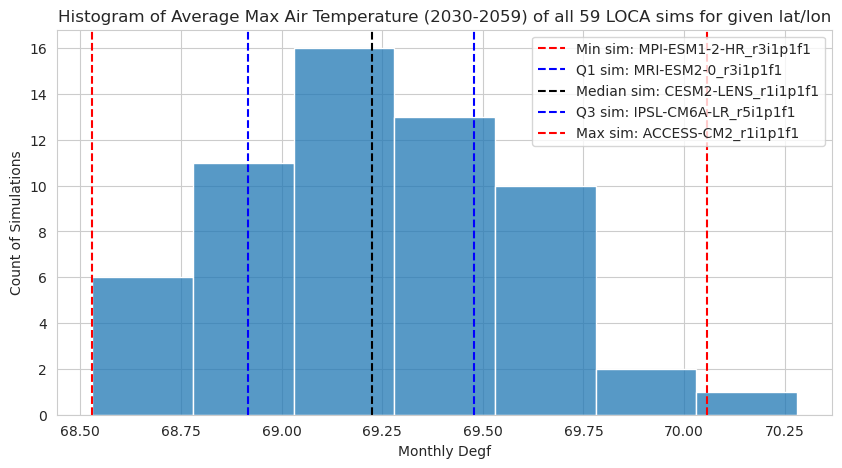

In [11]:
# Showing distribution of results
plot_sims(sorted_sims_gridcell, dropdown_val.value)

In [12]:
# Showing distribution of results
plot_sims(sorted_sims_area, dropdown_val.value)

NameError: name 'sorted_sims_area' is not defined